## Part 1

<b>EM falls under unsupervised learning. But what specific kind of unsupervised learning setting would you use it for? Put differently, you could use both k-means and EM for clustering, but when will you pick EM over k-means?</b>

- The k-Means algorithm makes general assumptions regarding the distribution of data and attempts to detect clusters within a dataset under the optimization criteria that the sum of the inter-cluster variances is minimized. This works well in detecting homogeneous clusters.  It assumes a spherical nature of the clusters.  The EM algorithm is an iterative optimization method that finds the maximum likelihood  estimate (MLE) of parameters in problems where hidden/missing/latent variables are present. EM clusters are not limited to spherical shapes which allows us to detect sub-populations within our data with differing characteristics. 

In [6]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Part 2 <br>
Use EM for clustering “similar” countries.

In [34]:
lifecycle = pd.read_csv('/Users/jennyskytta/Desktop/lifecycle.csv')
lifecycle.rename(columns={"Contry": "country"}, inplace = True)
lifecycle.sample(1)

,country,sr,pop15,pop75,dpi,ddpi
27,Netherlands,14.65,24.71,3.25,1740.7,7.66


In [35]:
lifecycle.shape # very small dataset

(50, 6)

In [36]:
X = lifecycle[["pop15", "pop75", "dpi", "ddpi"]]

In [37]:
from sklearn.mixture import GaussianMixture
m = GaussianMixture(5, covariance_type="diag") # this is a multivariate model
_=m.fit(X)
m.bic(X)  # compute BIC  which we will use to compare models using RMSE 

1463.179456890932

In [11]:
pred = m.predict(X) # predicted array
pred

array([2, 1, 1, 0, 3, 2, 3, 0, 3, 3, 1, 3, 4, 1, 1, 4, 3, 0, 4, 3, 4, 1,
       4, 0, 1, 4, 1, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 4, 1, 1, 3, 3, 1, 2,
       3, 0, 0, 4, 0, 0])

<h3> BIC: Bayesian Information Criteria</h3>

In [28]:
ks = range(1,8)
bics =[]
for k in ks:
    m = GaussianMixture(k, covariance_type="diag")
    _ = m.fit(X)
    bics.append(m.bic(X))
    print(f"k={k}, diag BIC={m.bic(X)}")
sorted(bics)  # 5 is lowest 

k=1, diag BIC=1637.0342381040148
k=2, diag BIC=1459.3069219117738
k=3, diag BIC=1482.055821546593
k=4, diag BIC=1458.760500851607
k=5, diag BIC=1439.4060983304241
k=6, diag BIC=1441.5853209404627
k=7, diag BIC=1462.751329588045


[1439.4060983304241,
 1441.5853209404627,
 1458.760500851607,
 1459.3069219117738,
 1462.751329588045,
 1482.055821546593,
 1637.0342381040148]

In [39]:
m = GaussianMixture(5, covariance_type="spherical")
_ = m.fit(X)
lifecycle["BIC_country"] = m.predict(X)  # BIC membership added to DF
lifecycle.sample(3) 

,country,sr,pop15,pop75,dpi,ddpi,BIC_country
10,Denmark,16.85,24.42,3.93,2496.53,3.99,1
23,Korea,3.98,41.74,0.91,207.68,5.81,0
9,Costa Rica,10.78,47.64,1.14,471.24,2.80,4


In [14]:
# calculate average characteristics by similarity 
# only retaining our outcome variables and take the average 
avgs = lifecycle.groupby("BIC_country")\
[["pop15", "pop75", "sr", "dpi", "ddpi"]]\
.mean()
avgs

,pop15,pop75,sr,dpi,ddpi
BIC_country,,,,,
0,24.647500,3.801250,12.671250,2364.625000,3.316250
1,35.860000,1.972727,9.882727,680.215455,4.042727
2,27.607778,3.368889,11.603333,1546.524444,3.948889
3,27.656667,3.606667,7.736667,3428.086667,2.630000
4,43.757895,1.126316,7.675263,249.240526,3.865789


In [40]:
rmse = np.sqrt(np.mean((lifecycle[["sr"]] - avgs[["sr"]].values[lifecycle.BIC_country])**2))
rmse

/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


sr    4.564277
dtype: float64

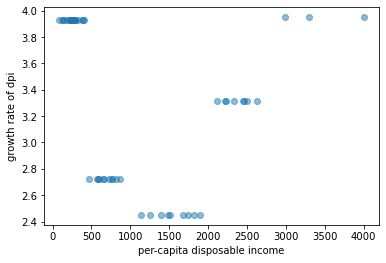

In [50]:
# the plot tells us that one component has relatively small flow values between 20 and 60 

import matplotlib.pyplot as plt

_ = plt.scatter(lifecycle[["dpi"]], 
                avgs[["ddpi"]].values[lifecycle.BIC_country],
                alpha=0.5) #semi transparent 
_ = plt.xlabel("per-capita disposable income") # picks out average flow 
_ = plt.ylabel("growth rate of dpi")
_ = plt.show()

<h3>AIC: Akaike Information Criteria </h3>

In [53]:
from sklearn.mixture import GaussianMixture
m2 = GaussianMixture(5, covariance_type="spherical")
m2.fit(X)
print(m2.aic(X))

2457.265492541115


In [54]:
ks = range(1,10)
aics =[]
for k in ks:
    m2 = GaussianMixture(k, covariance_type="diag")
    _ = m2.fit(X)
    aics.append(m2.aic(X))
    print(f"k={k}, diag AIC={m2.aic(X)}")
sorted(aics)

k=1, diag AIC=1621.7380540605895
k=2, diag AIC=1426.8025308194954
k=3, diag AIC=1408.1979854003507
k=4, diag AIC=1395.4085472376614
k=5, diag AIC=1379.0509846807292
k=6, diag AIC=1338.9164751432158
k=7, diag AIC=1362.1568740808634
k=8, diag AIC=1359.1282997160356
k=9, diag AIC=1362.295211258007


[1338.9164751432158,
 1359.1282997160356,
 1362.1568740808634,
 1362.295211258007,
 1379.0509846807292,
 1395.4085472376614,
 1408.1979854003507,
 1426.8025308194954,
 1621.7380540605895]

In [66]:
m2 = GaussianMixture(5, covariance_type="diag")
_ = m2.fit(X)
lifecycle["AIC_country"] = m2.predict(X)  # component membership added to DF
lifecycle.sample(5)

,country,sr,pop15,pop75,dpi,ddpi,BIC_country,AIC_country
39,Switzerland,14.13,23.49,3.73,2630.96,2.70,1,3
27,Netherlands,14.65,24.71,3.25,1740.70,7.66,2,1
34,Portugal,12.49,28.96,2.85,579.51,7.48,4,0
42,United Kingdom,7.81,23.27,4.46,1813.93,2.01,2,1
10,Denmark,16.85,24.42,3.93,2496.53,3.99,1,1


In [56]:
# calculate average characteristics by similarity 
# only retaining our outcome variables and take the average 
avgs = lifecycle.groupby("AIC_country")\
[["pop15", "pop75", "sr", "dpi", "ddpi"]]\
.mean()
avgs

,pop15,pop75,sr,dpi,ddpi
AIC_country,,,,,
0,23.670909,4.039091,11.905455,2236.248182,3.286364
1,44.403333,1.096000,6.749333,395.019333,2.182000
2,29.554615,2.752308,11.873846,1053.508462,4.489231
3,30.293333,3.050000,9.260000,3104.816667,2.583333
4,44.120000,1.106250,8.651250,225.480000,6.611250


In [57]:
rmse = np.sqrt(np.mean((lifecycle[["sr"]] - avgs[["sr"]].values[lifecycle.AIC_country])**2))
rmse

/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


sr    3.81774
dtype: float64

## Part 2
Report how many groups you got and why you chose that number with the help of AIC and BIC. 

- After running the BIC, I observed that 5 clusters was the optimal of the loop.  I ran the same loop using AIC, and observed 6 clusters possibly being best.  RMSE was still lower using AIC with 5 clusters so I ultimately decided to use that number. The cluster certainly appear to differ from AIC and BIC in terms of which countries are allocated to which cluster.  For example Switzerland is in cluster 1 in BIC and in cluster 3 in AIC. 

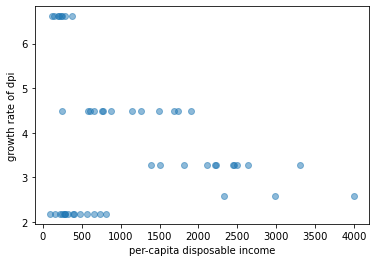

In [61]:
# the plot tells us that one component has relatively small flow values between 20 and 60 

import matplotlib.pyplot as plt

_ = plt.scatter(lifecycle[["dpi"]], 
                avgs[["ddpi"]].values[lifecycle.AIC_country],
                alpha=0.5) #semi transparent 
_ = plt.xlabel("per-capita disposable income") # picks out average flow 
_ = plt.ylabel("growth rate of dpi")
_ = plt.show()

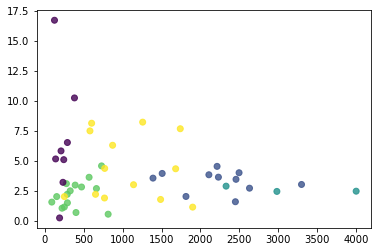

In [65]:
plt.scatter(X["dpi"], X["ddpi"], c = pred, alpha = 0.8)